> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: The Database Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

## Brief Introduction

This data set contains information
about ten thousand movies collected from
The Movie Database (TMDb),
including user ratings and revenue.

## Questions
<ul>
<li>
<ul>Which genres are most popular from
year to year? </ul>
</li>
<li><ul>Which director has the highest revenue ?</ul></li>
<li><ul>Which director is the most popular ?</ul></li>
<li><ul>Whhich director has the highest revenue on the average?</ul></li>
</ul>

In [2]:
# Upgrade pandas to use dataframe.explode() function
!pip install --upgrade pandas

    100% |████████████████████████████████| 9.5MB 1.5MB/s eta 0:00:01    12% |███▉                            | 1.1MB 12.6MB/s eta 0:00:01    17% |█████▊                          | 1.7MB 9.9MB/s eta 0:00:01    29% |█████████▍                      | 2.8MB 12.3MB/s eta 0:00:01    35% |███████████▍                    | 3.4MB 13.1MB/s eta 0:00:01    53% |█████████████████               | 5.1MB 14.4MB/s eta 0:00:01    58% |██████████████████▉             | 5.6MB 12.8MB/s eta 0:00:01    65% |████████████████████▉           | 6.2MB 13.2MB/s eta 0:00:01    70% |██████████████████████▊         | 6.7MB 12.5MB/s eta 0:00:01    77% |████████████████████████▋       | 7.3MB 12.9MB/s eta 0:00:01    82% |██████████████████████████▌     | 7.9MB 10.7MB/s eta 0:00:01    88% |████████████████████████████▍   | 8.4MB 12.7MB/s eta 0:00:01    94% |██████████████████████████████▎ | 9.0MB 12.1MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 1.2MB/s ta 0:00:011   20% |██████▊                  

In [ ]:
# Upgrade pandas to use dataframe.explode() function
!pip install --upgrade seaborn

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [ ]:
# Load your data and print out a few lines. Perform operations to inspect data
##types and look for instances of missing or possibly errant data.


### The shape is the number of rows and columns of the DataFrame
#There are 10866 rows and 21 columns

In [3]:
df.shape

(10866, 21)

## Dataframe info
#Info gives an overview of the dataset
Range index: 10666 entries
Data colums: 21
dtypes: float64(4), int64(6), object(11)
Also, some columns like hompage, tagline e.t.c. have lower entries as
compared to the total entries(10866. This can be due to empty cells, duplicated rows, non values
and incorrect data format.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

# Gives an overview of the statistics of the movie dataset

The describe function gives a descriptive statistics summary of dataframe.

In [22]:

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [5]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#df.column.str.replace(to_be=replaced, "ASAP" )


## Checks for the number of duplicated rows
The df.duplicated().sum() function checks for the total duplicates in the data

In [6]:
# check for duplicates in the data

(df.duplicated().sum())

1

## Clean duplicated Rows

The drop_duplicated function helps to clean duplicated rows


In [7]:
#Get the duplicated rows in the df

df.drop_duplicates().head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


# dropduplicates(inplace=True)
The dropduplicates(inplace=True) function returns to write over my current dataframe 
to return a dataframe with no duplicated rows.

In [8]:
df.drop_duplicates(inplace=True)

# duplicated().sum()
To check if there is still duplicated rows left

In [9]:
(df.duplicated().sum())

0

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Replace this header name!).column

# Question 1: Which genres are most popular from year to year?


In [10]:
#Question
#Which genres are most popular from year to year? 
df.groupby(['genres','release_date'])['popularity'].mean()

genres                       release_date
Action                       1/1/03          0.201014
                             1/1/05          0.380058
                             1/1/07          0.282030
                             1/1/11          0.476179
                             1/1/12          0.524246
                                               ...   
Western|Drama|Crime|Romance  7/3/13          0.393664
Western|History              5/12/80         0.128234
Western|History|War          4/7/04          0.948560
Western|Horror|Thriller      10/30/99        0.354484
Western|Thriller             1/24/13         0.387592
Name: popularity, Length: 10633, dtype: float64

# Question 2:  Which genres are the top 4 
The split function is used to determine the top 4 genres:
'Action', 'Adventure', 'Science Fiction', 'Thriller'

In [ ]:
df.genres.str.split("|")[0]

# Question 3: which director has the highest average revenue and popularity?

1. Andrew Adamson, Kelly Asbury,Conrad Vernon   
2. Andrew Stanton, Lee Unkrich                   
3. Pete Docter   

In [11]:
def mean_per_group(group, measure):
    return df.groupby(group)[measure].mean().sort_values(ascending=False).head()

In [12]:
mean_per_group("director", "revenue")

director
Kyle Balda|Pierre Coffin                     1.156731e+09
Lee Unkrich                                  1.063172e+09
Andrew Adamson|Kelly Asbury|Conrad Vernon    9.198388e+08
Andrew Stanton|Lee Unkrich                   8.646260e+08
Pete Docter                                  8.537086e+08
Name: revenue, dtype: float64

# Question 4: which directior is the most popular?

1. Colin Trevorrow                
2. Joe Russo|Anthony Russo       
3. Chad Stahelski|David Leitch   
4. Don Hall|Chris Williams         
5. Juno John Lee 

In [13]:
mean_per_group("director", "popularity")

director
Colin Trevorrow                16.696886
Joe Russo|Anthony Russo        12.971027
Chad Stahelski|David Leitch    11.422751
Don Hall|Chris Williams         8.691294
Juno John Lee                   8.411577
Name: popularity, dtype: float64

In [14]:
mean_per_group("genres", "revenue")

genres
Crime|Drama|Mystery|Thriller|Action          1.106280e+09
Action|Adventure|Science Fiction|Fantasy     1.034089e+09
Family|Fantasy|Adventure                     1.025467e+09
Adventure|Fantasy|Family|Mystery             9.382127e+08
Science Fiction|Thriller|Action|Adventure    8.474235e+08
Name: revenue, dtype: float64

In [16]:
(df.value_counts(subset=['release_year', 'popularity', 'genres']))

release_year  popularity  genres                                   
2015          32.985763   Action|Adventure|Science Fiction|Thriller    1
1999          0.538087    Drama|Thriller|Crime                         1
              0.596782    Drama|Family                                 1
              0.585123    Action|Adventure|Comedy                      1
              0.581756    Comedy|Drama|Romance                         1
                                                                      ..
2009          1.895894    Comedy|Romance|Drama                         1
              1.874759    Comedy|Mystery                               1
              1.860267    Comedy|Romance                               1
              1.849649    Animation|Comedy|Family                      1
1960          0.055821    Comedy|Romance                               1
Length: 10842, dtype: int64

# Question 4: Which genre has the highest vote counts?

The value count shows that Drama and Comedy have the highest vote counts

In [19]:
(df.value_counts(subset=['vote_count', 'genres'], ascending=False, ))

vote_count  genres                     
10          Comedy                         52
11          Drama                          39
12          Drama                          39
10          Drama                          37
11          Comedy                         32
                                           ..
145         Action|Comedy                   1
            Comedy|Crime|Thriller           1
            Comedy|Drama                    1
            Comedy|Family|Drama|Fantasy     1
61          Drama|Mystery|Thriller          1
Length: 8052, dtype: int64

In [15]:
(df.value_counts(subset=['vote_count', 'director', ''], ascending=False, ))

vote_count  director                    
10          Gerald Thomas                   7
12          William Dear                    4
            Steve Boyum                     3
41          Woody Allen                     3
13          Russell Mulcahy                 3
                                           ..
88          Ari Folman                      1
87          Tony Goldwyn                    1
            Tom McCarthy                    1
            Ted Demme                       1
10          Aaron Keeling|Austin Keeling    1
Length: 10601, dtype: int64

# This barplot shows the director with the top 5 highest revenue

1. Steven Spielberg
2. Peter Jackson
3. James Cameron
4. Michael Bay
5. Chistopher Noaiah


In [17]:
director_by_revenue = df.groupby("director")["revenue"].sum().sort_values(ascending=False).reset_index(name='revenue')

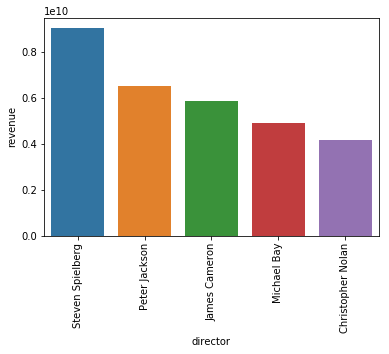

In [18]:
##This barplot shows the director with the highest revenue
sns.barplot(x='director', y="revenue", data=director_by_revenue.head());
plt.xticks(rotation=90);

# The Scatter plot shows the correlation between revenue and budget
The higher the budget given, the higher the revenue generated by the movies,which sows there is a correlation


In [21]:
df[["revenue", "budget"]].corr()

,revenue,budget
revenue,1.000000,0.734928
budget,0.734928,1.000000


# Histogram plots 

The histogram plots below shows the distribution of all numeric values.. i.e more movies were released from 
1960 to 2000 and beyond.


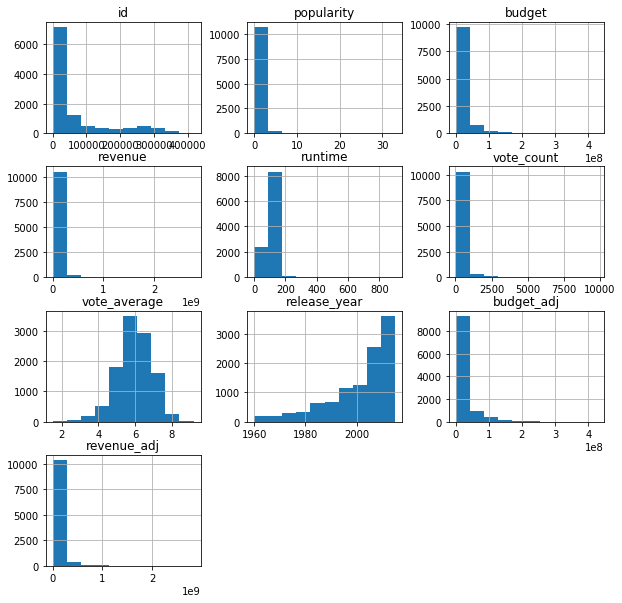

In [4]:
df.hist(figsize= (10,10) );

 ## histograms for all the numeric columns of the dataframe

## Conclusions

The dataset shows the western movies that was released over the years. My first analysis shows the top four genres that were watched the most which are 'Action', 'Adventure', 'Science Fiction', 'Thriller'. I could find a bit correlation between revenue and budget, which literally means;the higher the budget allocated to a movie, the more revenue it generates and vice-versa. Futhermore, the most intrigued genres like comedy and Drama also have the highest vote counts over the years.

After i analyzed the most pouuplar genres from year to year with action movies topping the list.I was also able to analyze the directors with the higest revenue.The histigram plot also shows that more movies were realeased over the years.

## Limitations

How was the movie runtime calculated? The dataset did give more details if it was per hour or day? Does the runtime determines the vote_counts? 






In [23]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0